Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 0.3856 - accuracy: 0.8905 - val_loss: 0.1863 - val_accuracy: 0.9463
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1665 - accuracy: 0.9525 - val_loss: 0.1502 - val_accuracy: 0.9560
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1250 - accuracy: 0.9630 - val_loss: 0.1205 - val_accuracy: 0.9650
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1005 - accuracy: 0.9692 - val_loss: 0.1110 - val_accuracy: 0.9666
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0826 - accuracy: 0.9750 - val_loss: 0.1016 - val_accuracy: 0.9705
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0703 - accuracy: 0.9791 - val_loss: 0.0942 - val_accuracy: 0.9720
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0615 - accuracy: 0.9822 - val_loss: 0.0905 - val_accuracy: 0.9740
Epoch 

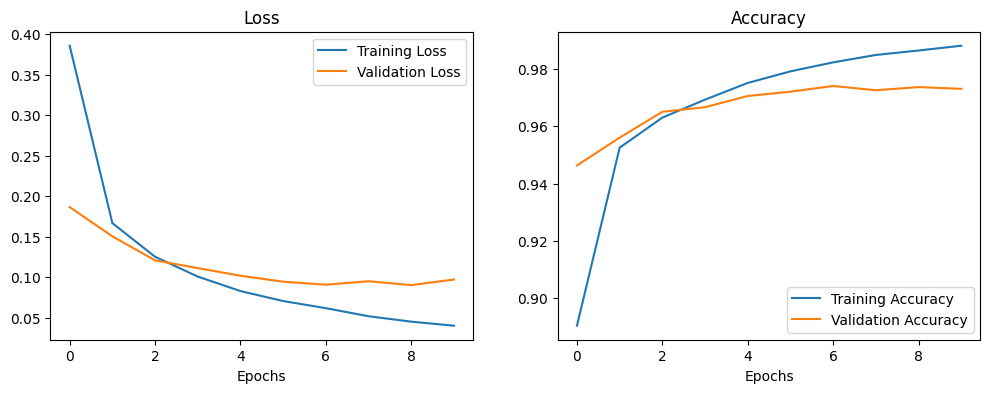

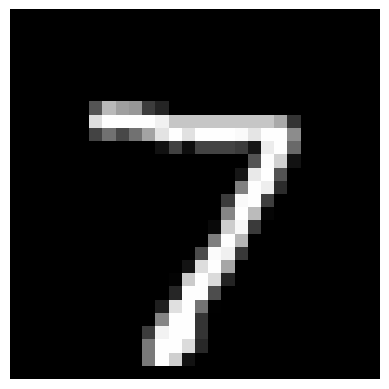

1/1 [==============================] - 0s 74ms/step
Predicted Label: 7
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4384 - accuracy: 0.8870 - val_loss: 0.2282 - val_accuracy: 0.9356
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1947 - accuracy: 0.9451 - val_loss: 0.1583 - val_accuracy: 0.9549
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1414 - accuracy: 0.9589 - val_loss: 0.1296 - val_accuracy: 0.9607
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1088 - accuracy: 0.9687 - val_loss: 0.1115 - val_accuracy: 0.9663
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0874 - accuracy: 0.9753 - val_loss: 0.0966 - val_accuracy: 0.9703
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0724 - accuracy: 0.9790 - val_loss: 0.0913 - val_accuracy: 0.9715
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape((60000, 784))
X_train = X_train.astype('float32') / 255.0
X_test = X_test.reshape((10000, 784))
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Create a sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

# Task 1: Plot the loss and accuracy for training and validation data
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.show()

# Task 2: Plot one of the images in the test data and perform inference
image_index = 0
plt.imshow(X_test[image_index].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()

image = X_test[image_index].reshape(1, 784)
prediction = model.predict(image)
predicted_label = np.argmax(prediction)
print("Predicted Label:", predicted_label)

# Task 3: Changing the number of hidden layers and activation function
model = Sequential()
model.add(Dense(64, activation='tanh', input_shape=(784,)))
model.add(Dense(32, activation='tanh'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

# Task 4: Running the code without scaling the images
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model without scaling the images
history = model.fit(X_train * 255.0, y_train, epochs=10, batch_size=128, validation_data=(X_test * 255.0, y_test))
